In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

In [38]:
gold = pd.read_csv('gld_price_data.csv')

In [39]:
gold.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


# getting some basic informations about the data

In [40]:
gold.shape

(2290, 6)

In [41]:
gold.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [42]:
# checking the number of missing values
gold.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [43]:
# getting the statistical measures of the data
gold.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


# Correlation:

Positive Correlation                                    
Negative Correlation

In [44]:
correlation = gold.corr()

<AxesSubplot:>

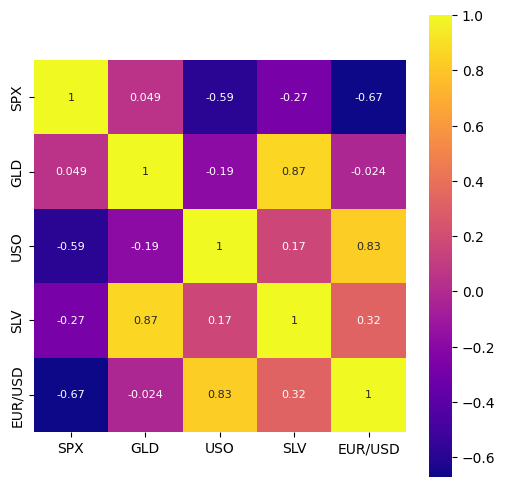

In [46]:
plt.figure(figsize=(6,6))
sns.heatmap(correlation,cbar=True,square=True,annot=True,annot_kws={"size":8},cmap="plasma")

In [47]:
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


In [16]:
# checking the distribution of the GLD Price

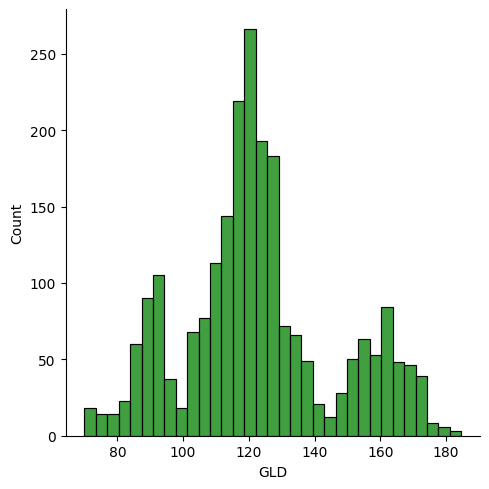

In [48]:
sns.displot(gold['GLD'],color='green')

# Splitting the Features and Target

In [49]:
X = gold.drop(['Date','GLD'],axis=1)
y = gold['GLD']

In [51]:
y.shape

(2290,)

# training the model

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
reg = RandomForestRegressor()
reg.fit(X_train,y_train)
pred = reg.predict(X_test)
print(y_test,)

[168.42049899  81.92899986 116.06290025 127.47270069 120.76800168
 154.816098   150.63449813 126.24160026 117.61229858 125.87560075
 116.7799005  172.3509004  141.4206977  167.86949899 115.16289984
 117.73100047 138.0928029  170.05260063 159.64630333 160.53940024
 155.14419993 125.27730024 175.62459942 157.23060334 125.13260024
  93.71119972  77.82830032 120.67250023 119.13749966 167.37950023
  88.17000034 125.2665003   91.28890061 117.61480012 121.14969946
 136.73090046 115.66390082 114.95190082 148.1035994  107.10380101
 104.54080251  87.0697978  126.52880068 117.70430001 154.73379932
 119.60370024 108.30409987 108.25129854  93.18530058 127.22389738
  75.01010047 113.61009891 121.32409987 111.33139909 119.00429892
 120.46309941 158.39039991 166.66550078 146.61029645  86.05379889
  94.30190045  86.94059923  90.51419998 118.97060078 126.40710074
 127.46819945 169.7046995  122.34299921 117.30399873  98.31070028
 168.63020085 143.07219884 131.97370276 121.1978022  121.2763995
 119.776700